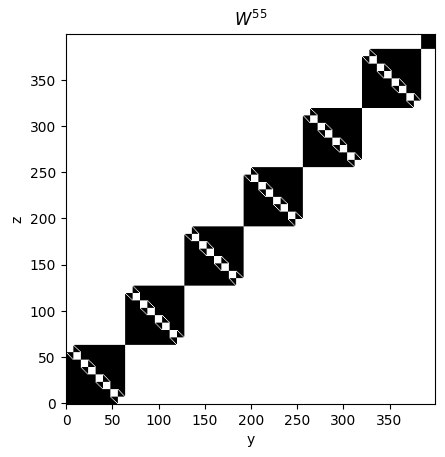

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

def supermex(s: np.ndarray):
  r = np.zeros_like(s)
  t = s.copy()
  m = s.shape[0]
  for i in range(m):
    j = 0
    while j < m and t[i, j]:
      j += 1
    if j == m:
      continue
    r[i, j] = True
    t[i:, j] = True
  return r

@dataclass
class NimSheet:
  sheet: np.ndarray
  x: int = 0
  is_winner: bool = True

  def show(self, save=False):
    plt.imshow(self.sheet)
    # plt.title(f'(Instant Winner) x = {self.x}' if self.is_winner else f'(Loser) x = {self.x}')
    plt.title(f'$W^{({self.x})}$')
    plt.xlabel('y')
    plt.ylabel('z')
    plt.gca().invert_yaxis()
    plt.set_cmap('gray_r')
    if save:
      plt.savefig(f'winner_{self.x}_{self.sheet.shape[0]}.png', dpi=300, bbox_inches='tight')
    plt.show()

  def loser(self):
    if self.is_winner:
      sheet = supermex(self.sheet)
      return NimSheet(sheet=sheet, x=self.x, is_winner=False)
    else:
      return self

  def R(self):
    sheet = self.sheet | supermex(self.sheet)
    return NimSheet(sheet=sheet, x=self.x + 1, is_winner=self.is_winner)

  def zero(m=10):
    return NimSheet(sheet=np.zeros((m, m), dtype=bool))

s = NimSheet.zero(m=400)
for _ in range(55):
  s = s.R()
s.show()

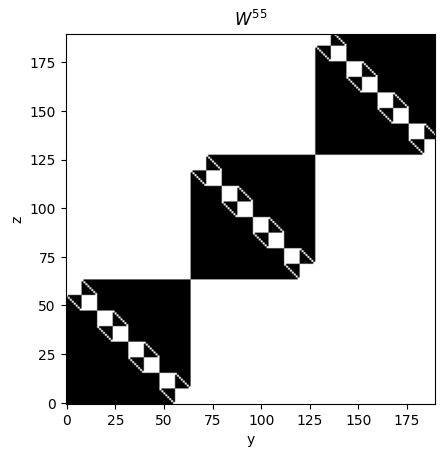

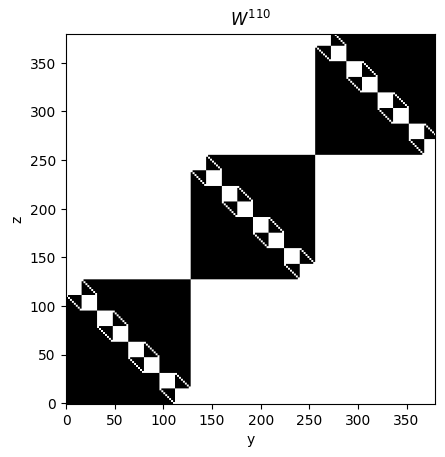

In [270]:
s = NimSheet.zero(m=190)
for _ in range(55):
  s = s.R()
s.show(save=True)

s = NimSheet.zero(m=380)
for _ in range(110):
  s = s.R()
s.show(save=True)

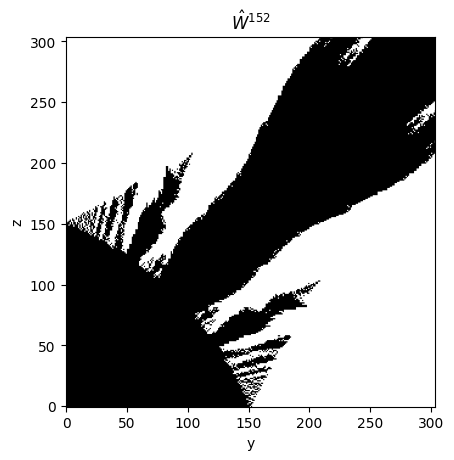

KeyboardInterrupt: 

In [3]:
@dataclass
class NimWithPassSheet:
  sheet: np.ndarray
  x: int = 0
  nim_sheet: NimSheet = None

  def show(self, save=False):
    plt.imshow(self.sheet)
    plt.title(f'$\hat{{W}}^{({self.x})}$')
    plt.xlabel('y')
    plt.ylabel('z')
    plt.gca().invert_yaxis()
    plt.set_cmap('gray_r')
    if save:
      plt.savefig(f'pass_winner_{self.x}_{self.sheet.shape[0]}.png', dpi=300, bbox_inches='tight')
    plt.show()

  def loser_sheet(self):
    p_positions = supermex(self.nim_sheet.sheet)
    if self.x == 0:
      p_positions[0, 0] = False
    sheet = supermex(self.sheet | p_positions)
    return sheet

  def R(self):
    sheet = self.sheet | self.loser_sheet()
    nim_sheet = self.nim_sheet.R()
    return NimWithPassSheet(sheet=sheet, x=self.x + 1, nim_sheet=nim_sheet)

  def zero(m=10):
    return NimWithPassSheet(sheet=np.zeros((m, m), dtype=bool), nim_sheet=NimSheet.zero(m=m))

for scale in [2, 4, 8]:
  W_hat = NimWithPassSheet.zero(m=scale * 76 * 2)
  for t in range(scale * 76):
    W_hat = W_hat.R()
  W_hat.show(save=True)

W_hat = NimWithPassSheet.zero(m=560)
for t in range(280):
  W_hat = W_hat.R()
W_hat.show(save=True)

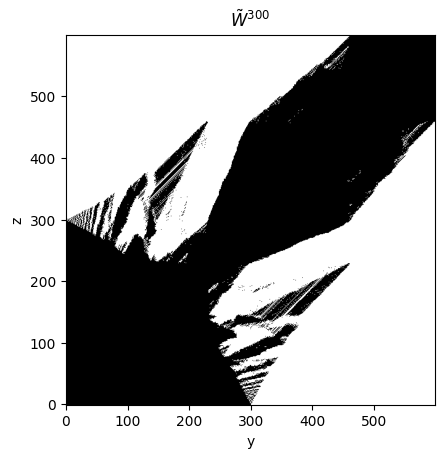

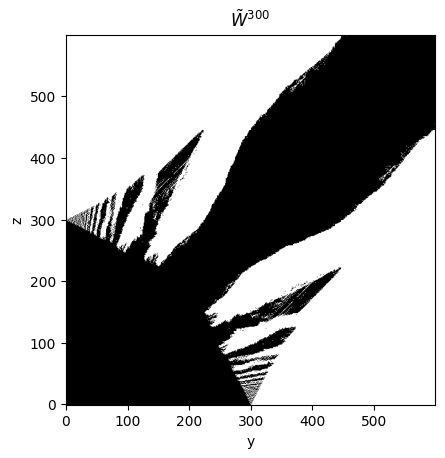

In [356]:
@dataclass
class GenericNim:
  sheet: np.ndarray
  x: int = 0

  def show(self, save=False, name="generic"):
    plt.imshow(self.sheet)
    plt.title(f'$\\tilde{{W}}^{({self.x})}$')
    plt.xlabel('y')
    plt.ylabel('z')
    plt.gca().invert_yaxis()
    plt.set_cmap('gray_r')
    if save:
      plt.savefig(f'{name}_winner_{self.x}_{self.sheet.shape[0]}.png', dpi=300, bbox_inches='tight')
    plt.show()

  def R(self, V: np.ndarray=None):
    if V is None:
      sheet = self.sheet | supermex(self.sheet)
    else:
      sheet = self.sheet | supermex(self.sheet | V)
    return GenericNim(sheet=sheet, x=self.x + 1)

  def zero(m=10):
    return GenericNim(sheet=np.zeros((m, m), dtype=bool))

m = 600
W_tilde = GenericNim.zero(m=m)
for _ in range(300):
  # V = np.zeros((m, m), dtype=bool)
  # r = np.minimum(np.arange(m), m - 1 - np.arange(m))
  # idx = np.floor(np.random.uniform(-r, r)).astype(int)
  # V[np.arange(m), np.arange(m) + idx] = True
  # W_tilde = W_tilde.R(V)
  V = np.zeros((m, m), dtype=bool)
  idx = np.random.randint(0, m, size=m)
  V[np.arange(m), idx] = True
  W_tilde = W_tilde.R(V)
W_tilde.show(save=True, name="normal")

W_tilde = GenericNim.zero(m=m)
V = np.zeros((m, m), dtype=bool)
V[1, 1] = True
W_tilde = W_tilde.R(V)
for _ in range(300-1):
  W_tilde = W_tilde.R()
W_tilde.show(save=True, name="perturb")

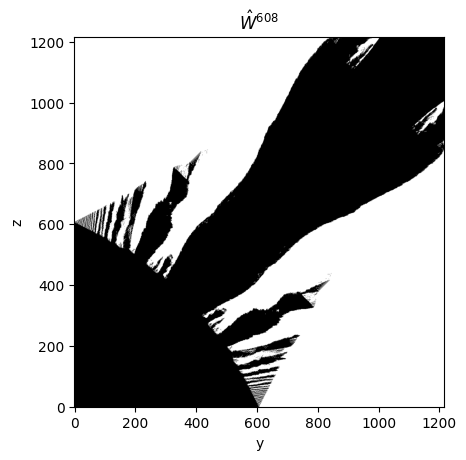

In [355]:
scale = 16
m = 76
W_hat = NimWithPassSheet.zero(m=scale * m)
for t in range(scale * m // 2):
  W_hat = W_hat.R()
W_hat.show(save=True)

In [10]:
m = 160
W_hat = NimWithPassSheet.zero(m=m)
# T = scale * m // 2
T = 76
arr = np.zeros((T, m, m), dtype=bool)
for t in range(T):
  W_hat = W_hat.R()
  arr[t, :, :] = W_hat.sheet
np.save(f'pass_winner_{T}_{m}.npy', arr)